In [1]:
import sys

import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

source = "/home/loek/projects/rnn/source"
sys.path.append(source)

from data_analysis.features import distxy_opt, distyy_opt, dist_split, feature_strength

In [2]:
mnist = torchvision.datasets.MNIST("/home/loek/projects/rnn/DNN/data", download=True)

dataset_default = [(np.array(image, dtype=int), label) for image, label in mnist]
dataset_hint = [
    (255 - np.array(image, dtype=int), label)
    if label == 9
    else (np.array(image, dtype=int), label)
    for image, label in mnist
]
dataset_random = [
    (255 - np.array(image, dtype=int), label)
    if random.random() > 0.5
    else (np.array(image, dtype=int), label)
    for image, label in mnist
]
dataset = dataset_hint

In [3]:
metric_func = distxy_opt
metric = lambda x, y: metric_func(x[0], y[0], x[1], y[1])

In [5]:
dataset = random.sample(dataset, 10000)

100%|██████████| 961/961 [00:20<00:00, 46.83it/s]


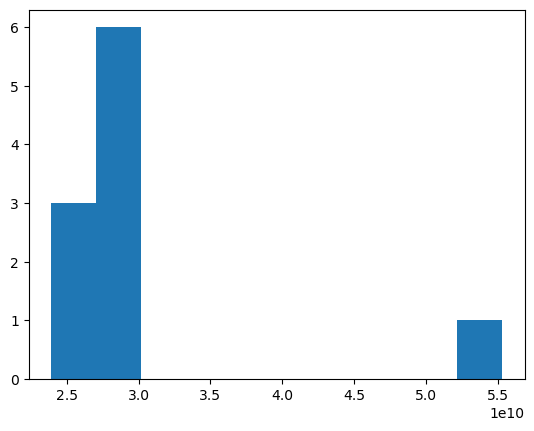

In [11]:
feature_strengths = []
for n in range(10):
    class_A = [point for point in dataset if point[1] == n]
    class_B = [point for point in dataset if point[1] != n]

    feature_strengths.append(feature_strength([class_A, class_B], metric))

plt.hist(feature_strengths)
plt.title("Feature strengths")
plt.show()

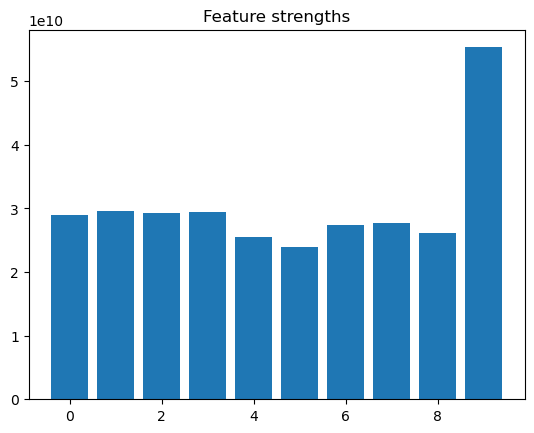

In [17]:
plt.bar(np.arange(10), feature_strengths)
plt.title("Feature strengths")
plt.show()

In [ ]:
class_A, class_B = dist_split(dataset, metric, n_iter=200000, n_sample=1000)

In [ ]:
av_A = np.sum([np.array(image) for image, label in class_A], axis=0) / len(class_A)
plt.figure(figsize=(2, 2))
plt.imshow(av_A)
plt.title("Average class A")
plt.show()
av_B = np.sum([np.array(image) for image, label in class_B], axis=0) / len(class_A)
plt.figure(figsize=(2, 2))
plt.imshow(av_B)
plt.title("Average class B")
plt.show()
labels_A = [label for image, label in class_A]
plt.figure(figsize=(4, 3))
plt.hist(labels_A)
plt.title("Labels A")
plt.show()
labels_B = [label for image, label in class_B]
plt.figure(figsize=(4, 3))
plt.hist(labels_B)
plt.title("Labels B")
plt.show()